# Linear regression with statsmodels
# using snack sales

In [41]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

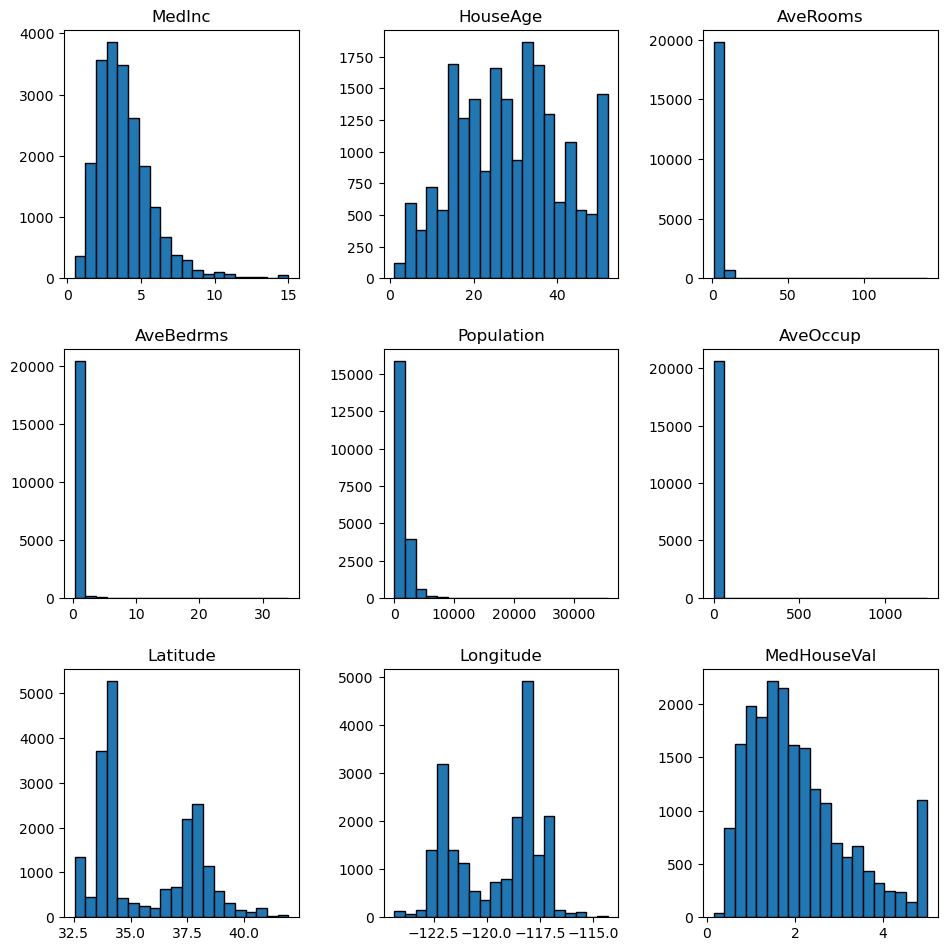

In [42]:
import matplotlib.pyplot as plt
import pandas as p

housing_data = p.DataFrame(california_housing.data, columns=california_housing.feature_names)
housing_data['MedHouseVal'] = california_housing.target

graph, graph_subplot = plt.subplots(3, 3, figsize=(10, 10))
graph.tight_layout(pad=3.0)

graph_subplot[0, 0].hist(housing_data['MedInc'], bins=20, edgecolor='black')
graph_subplot[0, 0].set_title('MedInc')

graph_subplot[0, 1].hist(housing_data['HouseAge'], bins=20, edgecolor='black')
graph_subplot[0, 1].set_title('HouseAge')

graph_subplot[0, 2].hist(housing_data['AveRooms'], bins=20, edgecolor='black')
graph_subplot[0, 2].set_title('AveRooms')

graph_subplot[1, 0].hist(housing_data['AveBedrms'], bins=20, edgecolor='black')
graph_subplot[1, 0].set_title('AveBedrms')

graph_subplot[1, 1].hist(housing_data['Population'], bins=20, edgecolor='black')
graph_subplot[1, 1].set_title('Population')

graph_subplot[1, 2].hist(housing_data['AveOccup'], bins=20, edgecolor='black')
graph_subplot[1, 2].set_title('AveOccup')

graph_subplot[2, 0].hist(housing_data['Latitude'], bins=20, edgecolor='black')
graph_subplot[2, 0].set_title('Latitude')

graph_subplot[2, 1].hist(housing_data['Longitude'], bins=20, edgecolor='black')
graph_subplot[2, 1].set_title('Longitude')

graph_subplot[2, 2].hist(housing_data['MedHouseVal'], bins=20, edgecolor='black')
graph_subplot[2, 2].set_title('MedHouseVal')

plt.show()

In [43]:
summary_statistics = housing_data.describe()
summary_statistics

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [44]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

X, y = datasets.fetch_california_housing(data_home="data", return_X_y=True, as_frame=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

(X_train.shape,
 X_test.shape,
 y_train.shape,
 y_test.shape)

((16512, 8), (4128, 8), (16512,), (4128,))

In [45]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:            MedHouseVal   R-squared (uncentered):                   0.892
Model:                            OLS   Adj. R-squared (uncentered):              0.892
Method:                 Least Squares   F-statistic:                          1.699e+04
Date:                Thu, 19 Sep 2024   Prob (F-statistic):                        0.00
Time:                        22:58:15   Log-Likelihood:                         -19335.
No. Observations:               16512   AIC:                                  3.869e+04
Df Residuals:                   16504   BIC:                                  3.875e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

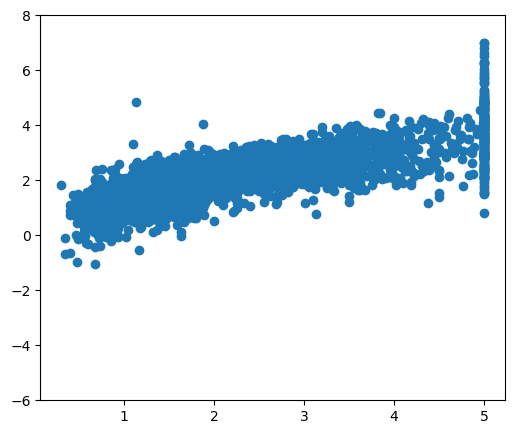

In [46]:
# Get y_pred using the training model and X_test. 
# Draw a scatter plot between y_test (x-axis) and y_pred (y-axis)
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const)
results = model.fit()

X_test_const = sm.add_constant(X_test)

y_pred = results.predict(X_test_const)

plt.figure(figsize=(6, 5))
plt.ylim(-6, 8) 
plt.scatter(y_test, y_pred, alpha=1)
plt.show()